In [1]:
import requests
import bs4
from bs4 import BeautifulSoup as bs
import urllib.request as ureq
import csv
import re
import numpy as np
import pandas as pd
import nltk
import random

import matplotlib.pyplot as plt

In [2]:
aus = pd.read_csv('aus-forum.csv', encoding="ISO-8859-1")
can = pd.read_csv('Canforum_p70s30.csv', encoding="ISO-8859-1")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0,5,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,175,176) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
print("Australia: "+str(len(aus)))
print("Canada: "+str(len(can)))

Australia: 262242
Canada: 172312


In [5]:
aus['d'] = pd.to_datetime(aus['Date'])
aus['month_year'] = aus['d'].dt.to_period('M')
aus['year'] = aus['d'].dt.year

In [6]:
can['d'] = pd.to_datetime(can['Date'], errors="coerce")
can['month_year'] = can['d'].dt.to_period('M')

In [7]:

aus['year'] = pd.DatetimeIndex(aus['d']).year
can['year'] = pd.DatetimeIndex(can['d']).year

In [8]:
can['year']

0         2019.0
1         2019.0
2         2020.0
3         2020.0
4         2020.0
           ...  
172307    2009.0
172308    2009.0
172309    2009.0
172310    2009.0
172311    2009.0
Name: year, Length: 172312, dtype: float64

In [9]:
aus_c = aus.groupby('year', as_index=False).count()
can_c = can.groupby('year', as_index=False).count()

In [10]:
can_c

,year,ID,Link,Date,Username,Message,Country,Like,Topic,Thread,...,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,d,month_year
0,2005.0,38,38,38,21,38,0,38,38,38,...,0,0,0,0,0,0,0,0,38,38
1,2006.0,109,109,109,102,109,0,109,109,109,...,0,0,0,0,0,0,0,0,109,109
2,2007.0,483,483,483,482,483,0,483,483,483,...,0,0,0,0,0,0,0,0,483,483
3,2008.0,1406,1406,1406,1390,1406,0,1406,1406,1406,...,0,0,0,0,0,0,0,0,1406,1406
4,2009.0,4532,4532,4532,4457,4531,0,4530,4530,4530,...,0,0,0,0,0,0,0,0,4532,4532
5,2010.0,7673,7673,7673,7517,7673,0,7673,7673,7673,...,0,0,0,0,0,0,0,0,7673,7673
6,2011.0,9257,9257,9257,9159,9257,0,9257,9257,9257,...,0,0,0,0,0,0,0,0,9257,9257
7,2012.0,12460,12460,12460,12337,12460,0,12460,12460,12460,...,0,0,0,0,0,0,0,0,12460,12460
8,2013.0,13548,13548,13548,13538,13545,0,13548,13548,13548,...,0,0,0,0,0,0,0,0,13548,13548
9,2014.0,13662,13662,13662,13657,13662,0,13662,13662,13662,...,0,0,0,0,0,0,0,0,13662,13662


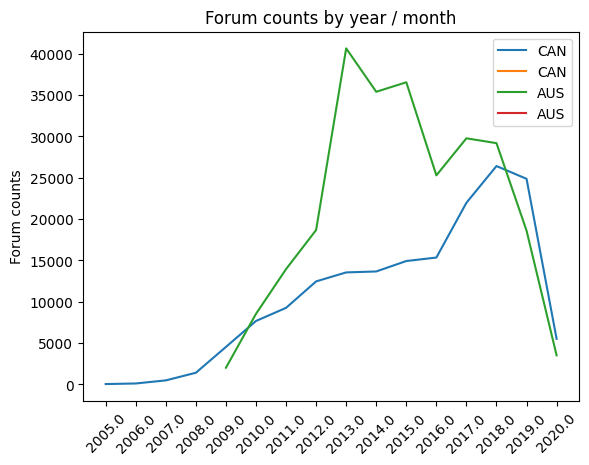

In [11]:
plt.rcdefaults()
fig, ax = plt.subplots()
width = 0.35
#df.groupby('month_year').count()['Link'].plot(ax=ax)

ax.plot(can_c['year'].astype(str), can_c['Link'], width, label="CAN")
ax.plot(aus_c['year'].astype(str), aus_c['Link'], width, label="AUS")

ax.legend()
ax.set_ylabel('Forum counts')
ax.set_title('Forum counts by year / month')
plt.xticks(rotation=45)

#plt.show()

plt.savefig("compare-counts.png")